## Tarea Semanal Nro 3 | Introducción a estimación espectral

#### **Introducción y fundamentos teóricos**
##### *Propuesta*

Para esta tarea semanal se trabajó sobre una señal

$$
x(t) = a_1 \cdot \sin(\Omega_1 \cdot t) + n_a(t)
$$

Con una frecuencia descripta como:

$$
\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}
$$

$$
\Omega_0 = \frac{\pi}{2}
$$

y variables aleatorias definidas por:

$$
f_r \sim \mathcal{U}\left(-\frac{1}{2}, \frac{1}{2}\right)
$$

$$
n_a \sim \mathcal{N}(0, \sigma^2)
$$

##### *La trampa caza bobos y como evitarla*

Al iniciar el trabajo de programación, todxs los alumnos cometimos el mismo error: Copiar la fórmula de la señal tal cual venía dada en la consigna y el profesor nos retó por caer en la trampa caza bobos.

Pero... ¿Dónde está el engaño?

Resulta que en la consigna el profesor nos muestra la propuesta usando una señal temporal CONTINUA, con frecuencia $f0=1/4 Hz$. Nuestro objetivo es simular una señal muestreada con $n=t \cdot f_s$ en la que se puedan modificar parámetros y jugar con las variables, por lo tanto, la fórmula generalizada quedaría así:

$$
x(n) = a_1 \cdot \sin\left(2\pi \cdot f_1 \cdot \frac{n}{f_s}\right) + n_a(n)
$$

donde la frecuencia $f_1$ está descrita por:

$$
f_1 = f_0 + f_r \cdot df
$$

y los parámetros $ f_0 $ y $ df $ se definen como:

$$
f_0 = \frac{f_s}{4}
$$

$$
df = \frac{f_s}{N}
$$

##### *Estimadores*

Los estimadores sirven para calcular con mayor o menor presición determinados parámetros de una señal. En este caso usaremos:

$$
\hat{a}_1^i = |X_w^i(\Omega_0)| = \left| \mathcal{F} \{ x(n) \cdot w_i(n) \} \right|
$$

$$
\hat{\Omega}_1^i = \underset{f}{arg\,max} \left\{ |X_w^i(\Omega)| \right\}
$$

##### *Ventanas*

Al muestrear una señal, implicitamente se la convoluciona con una ventana rectangular. Al calcular el espectro de esa señal, tambien se transorma la ventana convirtiendose en una sink que, dependiendo de nuestra resolución espectral $df = \frac{f_s}{N}$, si es un numero entero o no, puede traernos problemas. Cuando tenemos una resolución espectral NO entera, los puntos de muestreo no caen justo sobre los valles de la sink y la energía se "desparrama".

Para corregir este desparrame o mejorar el resultado de nuestro espectro, una buena opción es usar ventanas como la Harryblackman Harris o Flattop. Para aplicarlas, simplemente basta con multiplicarlas por la señal temporal antes de transformarla.
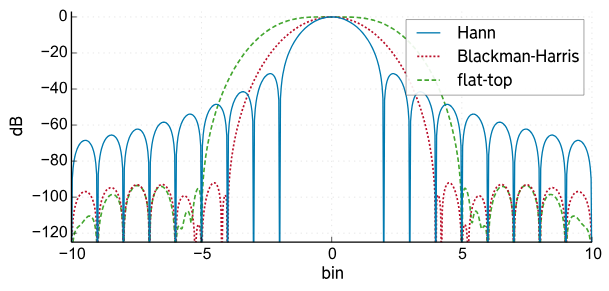



#### Con la propuesta clara, ahora sí, comencemos con los experimentos!!!

### Experimentación
#### Carga de las librerías

In [52]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, flattop, bartlett
from prettytable import PrettyTable


##### Definición de las señales a trabajar

In [53]:
# Carga de variables
numero_de_pruebas = 200
N = 1000  # número de muestras
fs = 1000  # frecuencia de muestreo en Hz
a1 = np.sqrt(2)  # Amplitud de la señal normalizada para que la potencia sea 1w

# Cálculo de parámetros
df = fs / N  # resolución espectral en Hz
f0 = fs / 4  # frecuencia central en Hz
fr = np.random.uniform(-0.5, 0.5, (1, numero_de_pruebas))
f1 = f0 + fr * df  

############################## SNR = 3 dB ##############################

SNR_3 = 3  # dB
pot_ruido_3 = 10 ** (-SNR_3 / 10)  # Potencia del ruido
ruido_3 = np.random.normal(0, np.sqrt(pot_ruido_3), (N, numero_de_pruebas))

# Generación de la señal de prueba
n = np.arange(N).reshape(-1, 1)  # (N, 1)
pruebas_3 = a1 * np.sin(2 * np.pi * f1 * n / fs) + ruido_3  # Señal de prueba

# Aplicar la ventana de Blackman-Harris
ventana_bh = blackmanharris(N)
pruebas_3_vent_bh = pruebas_3 * ventana_bh[:, np.newaxis]

# Aplicar la ventana de Flattop
ventana_ft = flattop(N)
pruebas_3_vent_ft = pruebas_3 * ventana_ft[:, np.newaxis]

# Aplicar la ventana de Barlett
ventana_bt = bartlett(N)
pruebas_3_vent_bt = pruebas_3 * ventana_bt[:, np.newaxis]


############################## SNR = 10 dB ##############################

SNR_10 = 10  # dB
pot_ruido_10 = 10 ** (-SNR_10 / 10)  # Potencia del ruido
ruido_10 = np.random.normal(0, np.sqrt(pot_ruido_10), (N, numero_de_pruebas))

# Generación de la señal de prueba
pruebas_10 = a1 * np.sin(2 * np.pi * f1 * n / fs) + ruido_10  # Señal de prueba

# Aplicar la ventana de Blackman-Harris
pruebas_10_vent_bh = pruebas_10 * ventana_bh[:, np.newaxis]

# Aplicar la ventana de Flattop
pruebas_10_vent_ft = pruebas_10 * ventana_ft[:, np.newaxis]

# Aplicar la ventana de Barlett
pruebas_10_vent_bt = pruebas_10 * ventana_bt[:, np.newaxis]


##### Gráfico temporal

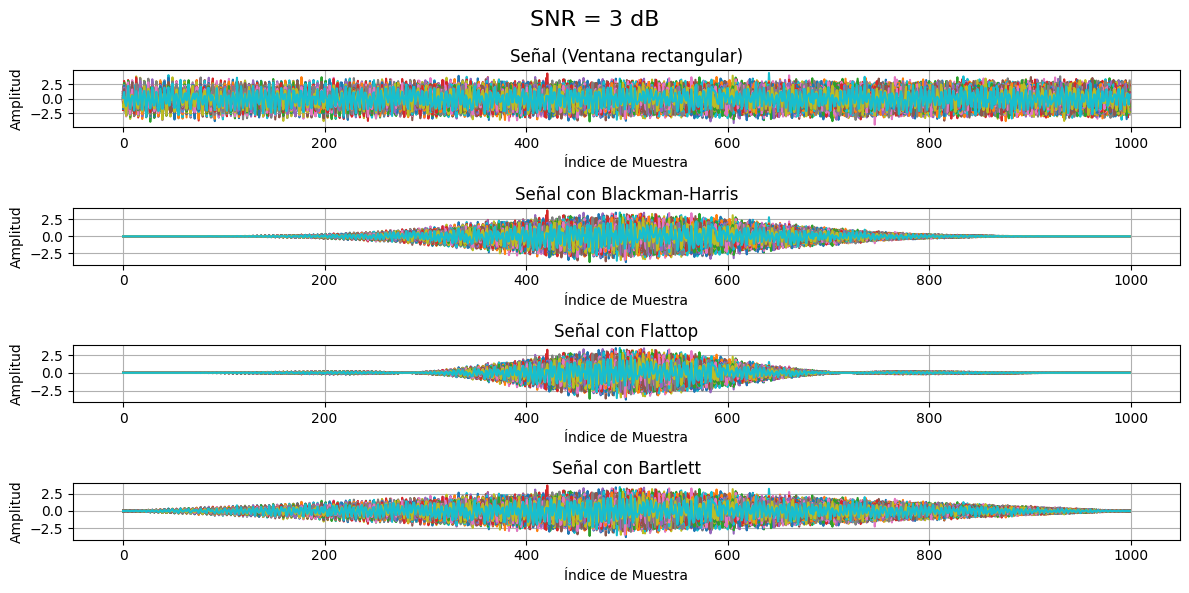

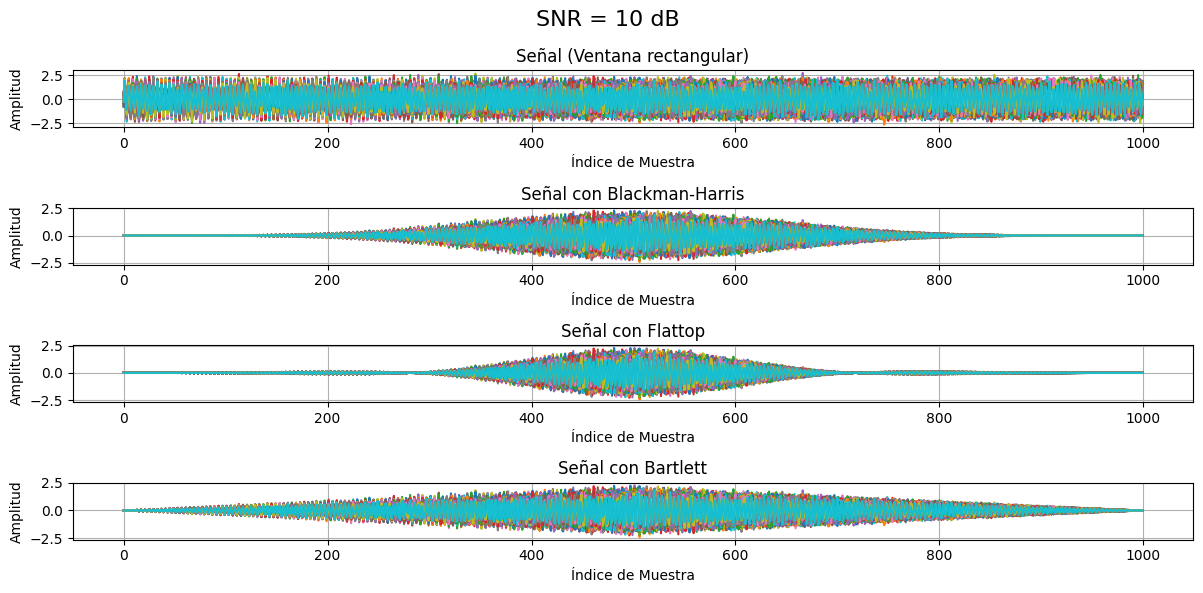

In [54]:
# === Gráfico de señales temporales para SNR = 3 dB ===

plt.figure(1, figsize=(12, 6))

# VENTANA RECTANGULAR
plt.subplot(4, 1, 1)
plt.plot(n, pruebas_3[:, :numero_de_pruebas])
plt.title('Señal (Ventana rectangular)')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

# VENTANA BLACKMAN-HARRIS
plt.subplot(4, 1, 2)
plt.plot(n, pruebas_3_vent_bh[:, :numero_de_pruebas])
plt.title('Señal con Blackman-Harris')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

# VENTANA FLATTOP
plt.subplot(4, 1, 3)
plt.plot(n, pruebas_3_vent_ft[:, :numero_de_pruebas])
plt.title('Señal con Flattop')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

# VENTANA BARTLETT
plt.subplot(4, 1, 4)
plt.plot(n, pruebas_3_vent_bt[:, :numero_de_pruebas])
plt.title('Señal con Bartlett')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.suptitle('SNR = 3 dB', fontsize=16)
plt.tight_layout()
plt.show()


# === Gráfico de señales temporales para SNR = 10 dB ===

plt.figure(2, figsize=(12, 6))

# VENTANA RECTANGULAR
plt.subplot(4, 1, 1)
plt.plot(n, pruebas_10[:, :numero_de_pruebas])
plt.title('Señal (Ventana rectangular)')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

# VENTANA BLACKMAN-HARRIS
plt.subplot(4, 1, 2)
plt.plot(n, pruebas_10_vent_bh[:, :numero_de_pruebas])
plt.title('Señal con Blackman-Harris')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

# VENTANA FLATTOP
plt.subplot(4, 1, 3)
plt.plot(n, pruebas_10_vent_ft[:, :numero_de_pruebas])
plt.title('Señal con Flattop')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

# VENTANA BARTLETT
plt.subplot(4, 1, 4)
plt.plot(n, pruebas_10_vent_bt[:, :numero_de_pruebas])
plt.title('Señal con Bartlett')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.suptitle('SNR = 10 dB', fontsize=16)
plt.tight_layout()
plt.show()


##### Gráfico del espectro

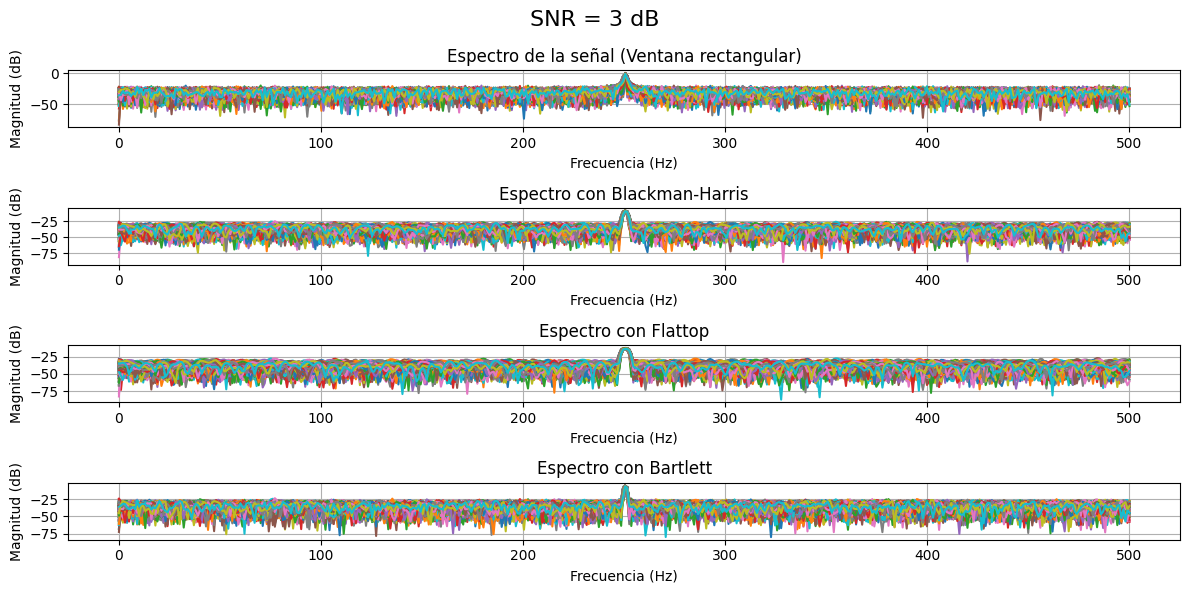

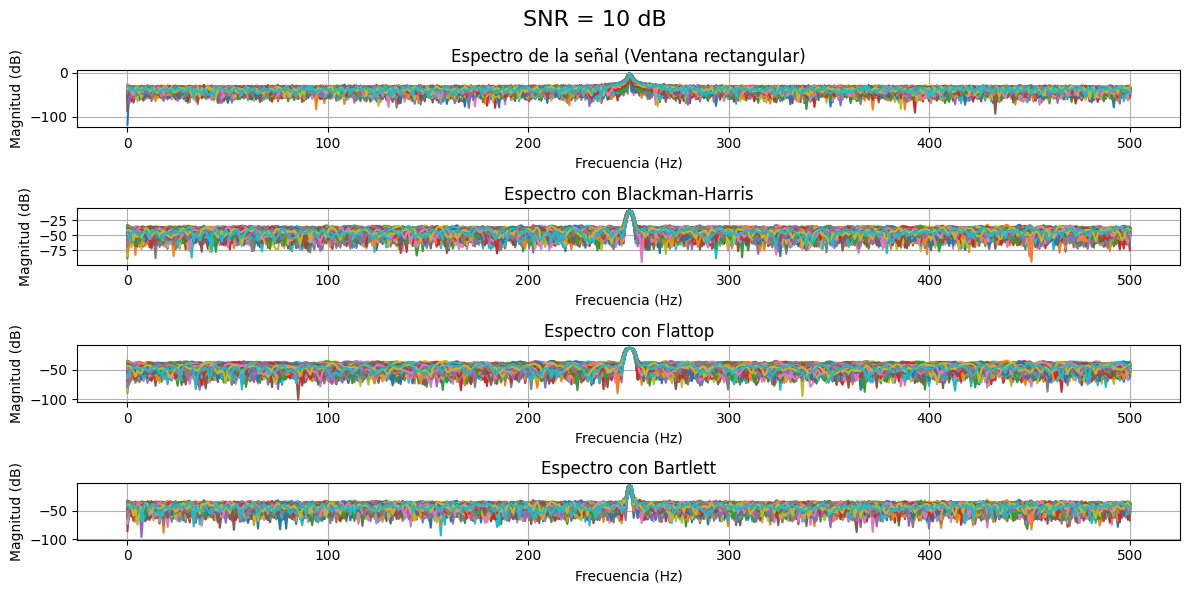

In [55]:
# === Gráfico del espectro para SNR = 3 dB ===

plt.figure(3, figsize=(12, 6))

ff = np.linspace(0, fs / 2, N // 2)  # Eje de frecuencias hasta Nyquist (fs/2)

# VENTANA RECTANGULAR
ft_3 = np.fft.fft(pruebas_3[:, :numero_de_pruebas], axis=0) / N
pot_3 = 2 * np.abs(ft_3[:N // 2, :])**2
pot_dB_3 = 10 * np.log10(pot_3)

plt.subplot(4, 1, 1)
plt.plot(ff, pot_dB_3)
plt.title('Espectro de la señal (Ventana rectangular)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# BLACKMAN-HARRIS
ft_3_bh = np.fft.fft(pruebas_3_vent_bh[:, :numero_de_pruebas], axis=0) / N
pot_3_bh = 2 * np.abs(ft_3_bh[:N // 2, :])**2
pot_dB_3_bh = 10 * np.log10(pot_3_bh)

plt.subplot(4, 1, 2)
plt.plot(ff, pot_dB_3_bh)
plt.title('Espectro con Blackman-Harris')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# FLATTOP
ft_3_ft = np.fft.fft(pruebas_3_vent_ft[:, :numero_de_pruebas], axis=0) / N
pot_3_ft = 2 * np.abs(ft_3_ft[:N // 2, :])**2
pot_dB_3_ft = 10 * np.log10(pot_3_ft)

plt.subplot(4, 1, 3)
plt.plot(ff, pot_dB_3_ft)
plt.title('Espectro con Flattop')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# BARTLETT
ft_3_bt = np.fft.fft(pruebas_3_vent_bt[:, :numero_de_pruebas], axis=0) / N
pot_3_bt = 2 * np.abs(ft_3_bt[:N // 2, :])**2
pot_dB_3_bt = 10 * np.log10(pot_3_bt)

plt.subplot(4, 1, 4)
plt.plot(ff, pot_dB_3_bt)
plt.title('Espectro con Bartlett')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.suptitle('SNR = 3 dB', fontsize=16)
plt.tight_layout()
plt.show()

# === Gráfico del espectro para SNR = 10 dB ===

plt.figure(4, figsize=(12, 6))

# VENTANA RECTANGULAR
ft_10 = np.fft.fft(pruebas_10[:, :numero_de_pruebas], axis=0) / N
pot_10 = 2 * np.abs(ft_10[:N // 2, :])**2
pot_dB_10 = 10 * np.log10(pot_10)

plt.subplot(4, 1, 1)
plt.plot(ff, pot_dB_10)
plt.title('Espectro de la señal (Ventana rectangular)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# BLACKMAN-HARRIS
ft_10_bh = np.fft.fft(pruebas_10_vent_bh[:, :numero_de_pruebas], axis=0) / N
pot_10_bh = 2 * np.abs(ft_10_bh[:N // 2, :])**2
pot_dB_10_bh = 10 * np.log10(pot_10_bh)

plt.subplot(4, 1, 2)
plt.plot(ff, pot_dB_10_bh)
plt.title('Espectro con Blackman-Harris')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# FLATTOP
ft_10_ft = np.fft.fft(pruebas_10_vent_ft[:, :numero_de_pruebas], axis=0) / N
pot_10_ft = 2 * np.abs(ft_10_ft[:N // 2, :])**2
pot_dB_10_ft = 10 * np.log10(pot_10_ft)

plt.subplot(4, 1, 3)
plt.plot(ff, pot_dB_10_ft)
plt.title('Espectro con Flattop')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

# BARTLETT
ft_10_bt = np.fft.fft(pruebas_10_vent_bt[:, :numero_de_pruebas], axis=0) / N
pot_10_bt = 2 * np.abs(ft_10_bt[:N // 2, :])**2
pot_dB_10_bt = 10 * np.log10(pot_10_bt)

plt.subplot(4, 1, 4)
plt.plot(ff, pot_dB_10_bt)
plt.title('Espectro con Bartlett')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.suptitle('SNR = 10 dB', fontsize=16)
plt.tight_layout()
plt.show()


##### Cálculo del estimador a y visualización de resultados

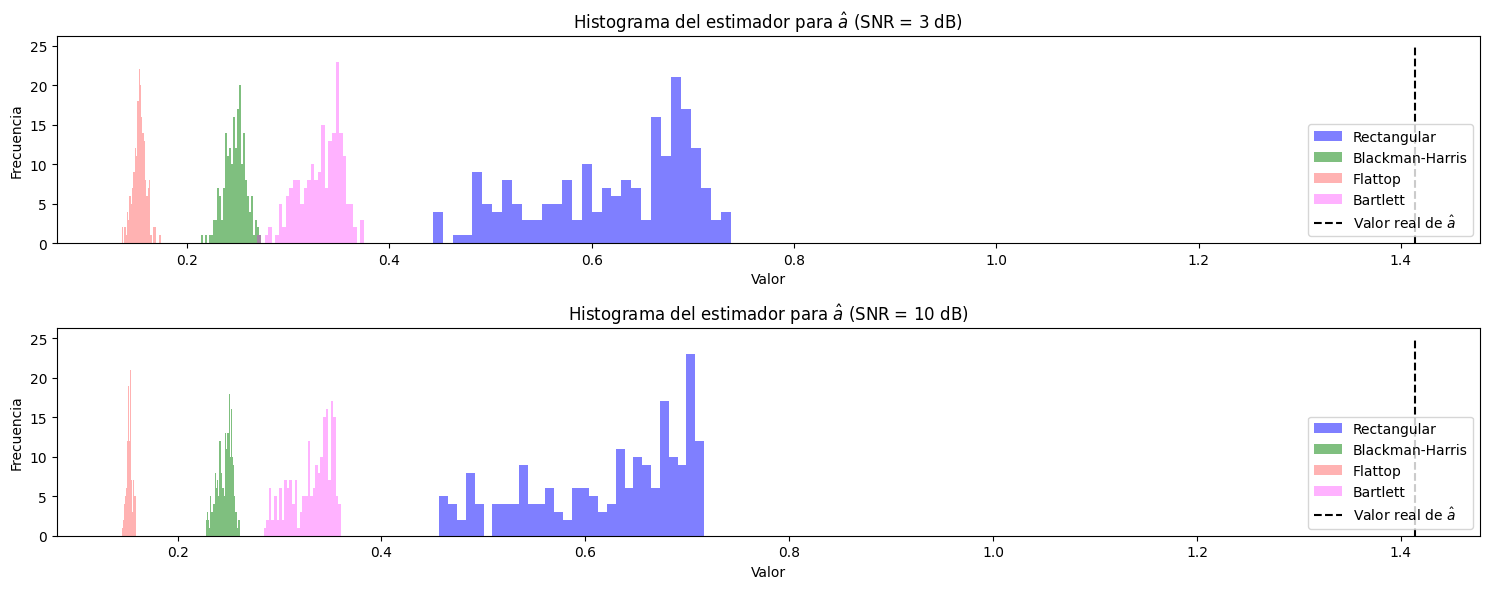

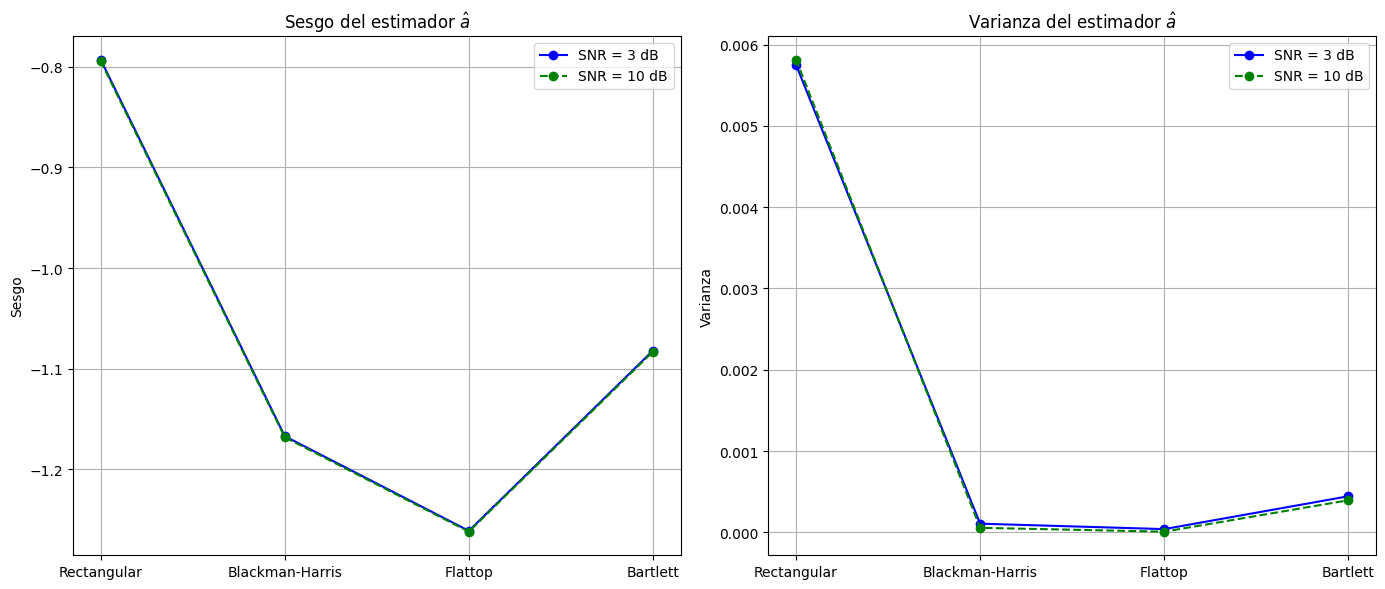

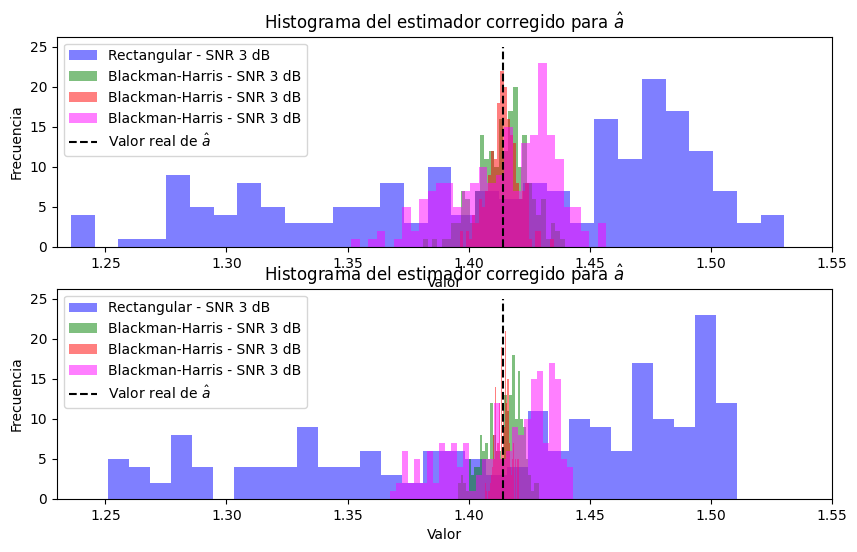

In [56]:
# === Estimación de a para SNR = 3 dB ===

a_est_3 = np.abs(ft_3[int(round(f0))])  
a_est_bh_3 = np.abs(ft_3_bh[int(round(f0))])  
a_est_ft_3 = np.abs(ft_3_ft[int(round(f0))])  
a_est_bt_3 = np.abs(ft_3_bt[int(round(f0))])  

plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.hist(a_est_3, bins=30, alpha=0.5, label='Rectangular', color='blue')
plt.hist(a_est_bh_3, bins=30, alpha=0.5, label='Blackman-Harris', color='green')
plt.hist(a_est_ft_3, bins=30, alpha=0.3, label='Flattop', color='red')
plt.hist(a_est_bt_3, bins=30, alpha=0.3, label='Bartlett', color='magenta')
plt.plot([a1, a1], [0, 25], 'k--', label='Valor real de $\hat{a}$')
plt.title('Histograma del estimador para $\hat{a}$ (SNR = 3 dB)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='best')


# === Estimación de a para SNR = 10 dB ===

a_est_10 = np.abs(ft_10[int(round(f0))])  
a_est_bh_10 = np.abs(ft_10_bh[int(round(f0))])  
a_est_ft_10 = np.abs(ft_10_ft[int(round(f0))])  
a_est_bt_10 = np.abs(ft_10_bt[int(round(f0))])  

plt.subplot(2,1,2)
plt.hist(a_est_10, bins=30, alpha=0.5, label='Rectangular', color='blue')
plt.hist(a_est_bh_10, bins=30, alpha=0.5, label='Blackman-Harris', color='green')
plt.hist(a_est_ft_10, bins=30, alpha=0.3, label='Flattop', color='red')
plt.hist(a_est_bt_10, bins=30, alpha=0.3, label='Bartlett', color='magenta')
plt.plot([a1, a1], [0, 25], 'k--', label='Valor real de $\hat{a}$')
plt.title('Histograma del estimador para $\hat{a}$ (SNR = 10 dB)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# === Sesgo y varianza para ambas SNR ===

# --- SNR = 3 dB ---
sesgo_3 = np.mean(a_est_3) - a1
sesgo_bh_3 = np.mean(a_est_bh_3) - a1
sesgo_ft_3 = np.mean(a_est_ft_3) - a1
sesgo_bt_3 = np.mean(a_est_bt_3) - a1

var_3 = np.var(a_est_3)
var_bh_3 = np.var(a_est_bh_3)
var_ft_3 = np.var(a_est_ft_3)
var_bt_3 = np.var(a_est_bt_3)

# --- SNR = 10 dB ---
sesgo_10 = np.mean(a_est_10) - a1
sesgo_bh_10 = np.mean(a_est_bh_10) - a1
sesgo_ft_10 = np.mean(a_est_ft_10) - a1
sesgo_bt_10 = np.mean(a_est_bt_10) - a1

var_10 = np.var(a_est_10)
var_bh_10 = np.var(a_est_bh_10)
var_ft_10 = np.var(a_est_ft_10)
var_bt_10 = np.var(a_est_bt_10)

# === Gráfico comparativo de sesgo y varianza ===

plt.figure(figsize=(14, 6))

# SESGO
plt.subplot(1, 2, 1)
plt.plot([1, 2, 3, 4], [sesgo_3, sesgo_bh_3, sesgo_ft_3, sesgo_bt_3], 'o-', label='SNR = 3 dB', color='blue')
plt.plot([1, 2, 3, 4], [sesgo_10, sesgo_bh_10, sesgo_ft_10, sesgo_bt_10], 'o--', label='SNR = 10 dB', color='green')
plt.xticks([1, 2, 3, 4], ['Rectangular', 'Blackman-Harris', 'Flattop', 'Bartlett'])
plt.title('Sesgo del estimador $\hat{a}$')
plt.ylabel('Sesgo')
plt.grid(True)
plt.legend()

# VARIANZA
plt.subplot(1, 2, 2)
plt.plot([1, 2, 3, 4], [var_3, var_bh_3, var_ft_3, var_bt_3], 'o-', label='SNR = 3 dB', color='blue')
plt.plot([1, 2, 3, 4], [var_10, var_bh_10, var_ft_10, var_bt_10], 'o--', label='SNR = 10 dB', color='green')
plt.xticks([1, 2, 3, 4], ['Rectangular', 'Blackman-Harris', 'Flattop', 'Bartlett'])
plt.title('Varianza del estimador $\hat{a}$')
plt.ylabel('Varianza')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# === Histogramas corregidos ===

plt.figure(figsize=(10, 6))
plt.subplot(2,1,1)
plt.hist(a_est_3 - sesgo_3, bins=30, alpha=0.5, label='Rectangular - SNR 3 dB', color='blue')
plt.hist(a_est_bh_3 - sesgo_bh_3, bins=30, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='green')
plt.hist(a_est_ft_3 - sesgo_ft_3, bins=30, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='red')
plt.hist(a_est_bt_3 - sesgo_bt_3, bins=30, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='magenta')
plt.plot([a1, a1], [0, 25], 'k--', label='Valor real de $\hat{a}$')
plt.xlim(1.23, 1.55)
plt.title('Histograma del estimador corregido para $\hat{a}$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.hist(a_est_10 - sesgo_10, bins=30, alpha=0.5, label='Rectangular - SNR 3 dB', color='blue')
plt.hist(a_est_bh_10 - sesgo_bh_10, bins=30, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='green')
plt.hist(a_est_ft_10 - sesgo_ft_10, bins=30, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='red')
plt.hist(a_est_bt_10 - sesgo_bt_10, bins=30, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='magenta')
plt.plot([a1, a1], [0, 25], 'k--', label='Valor real de $\hat{a}$')
plt.xlim(1.23, 1.55)
plt.title('Histograma del estimador corregido para $\hat{a}$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.show()


CONCLUSIONES: No importa cuan grande sea el sesgo de los estimadores, siempre vamos a buscar el que tiene mejor varianza ya que podemos corregir su desplazamiento pero no su exactitud 

##### Estimador de Omega

<function matplotlib.pyplot.show(close=None, block=None)>

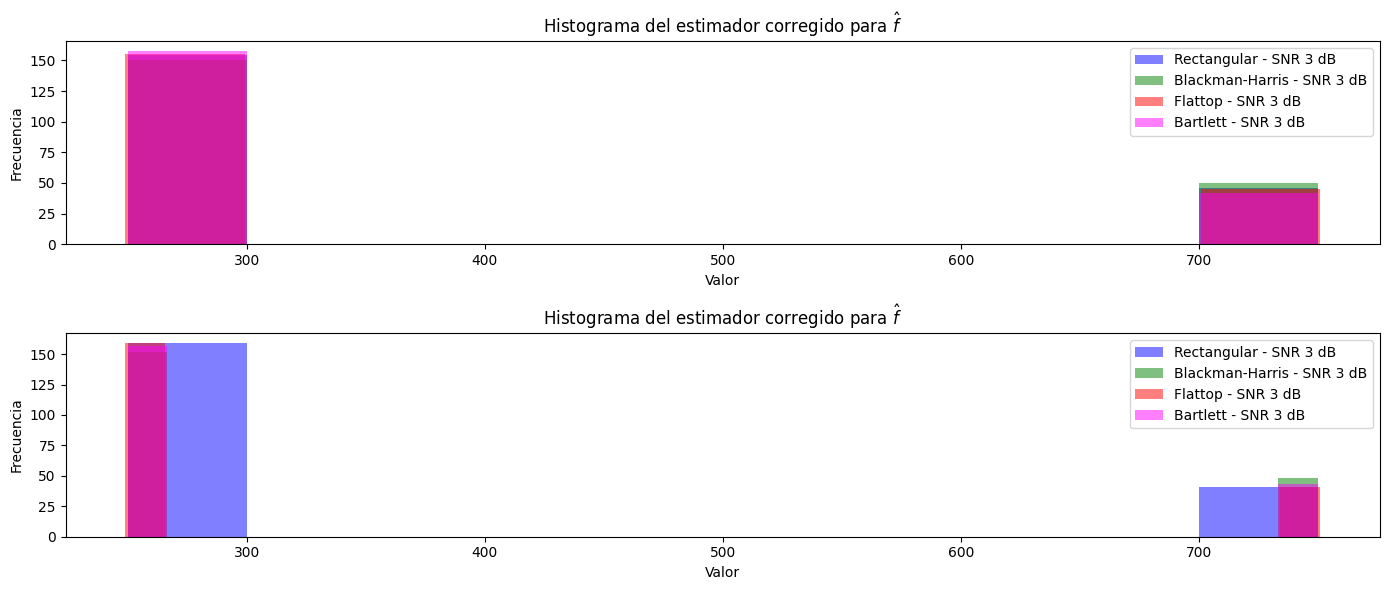

In [60]:
def estimador_w(X_fft, bfrec, df):
    z = np.argmax(np.abs(X_fft[bfrec, :]), axis=0) * df
    z_media = np.mean(z)
    z_var = np.var(z)
    return z, z_media, z_var

# ------------------------- SNR = 3 dB -------------------------

z_3 = np.argmax(np.abs(ft_3), axis=0) * df
z_media_3 = np.mean(z_3)
z_va_3 = np.var(z_3)
z_sesgo_3 = z_media_3 - f0

z_3_bh = np.argmax(np.abs(ft_3_bh), axis=0) * df
z_media_3_bh = np.mean(z_3_bh)
z_va_3_bh = np.var(z_3_bh)
z_sesgo_3_bh = z_media_3_bh - f0

z_3_ft = np.argmax(np.abs(ft_3_ft), axis=0) * df
z_media_3_ft = np.mean(z_3_ft)
z_va_3_ft = np.var(z_3_ft)
z_sesgo_3_ft = z_media_3_ft - f0

z_3_bt = np.argmax(np.abs(ft_3_bt), axis=0) * df
z_media_3_bt = np.mean(z_3_bt)
z_va_3_bt = np.var(z_3_bt)
z_sesgo_3_bt = z_media_3_bt - f0

# ------------------------- SNR = 10 dB -------------------------

z_10 = np.argmax(np.abs(ft_10), axis=0) * df
z_media_10 = np.mean(z_10)
z_va_10 = np.var(z_10)
z_sesgo_10 = z_media_10 - f0

z_10_bh = np.argmax(np.abs(ft_10_bh), axis=0) * df
z_media_10_bh = np.mean(z_10_bh)
z_va_10_bh = np.var(z_10_bh)
z_sesgo_10_bh = z_media_10_bh - f0

z_10_ft = np.argmax(np.abs(ft_10_ft), axis=0) * df
z_media_10_ft = np.mean(z_10_ft)
z_va_10_ft = np.var(z_10_ft)
z_sesgo_10_ft = z_media_10_ft - f0

z_10_bt = np.argmax(np.abs(ft_10_bt), axis=0) * df
z_media_10_bt = np.mean(z_10_bt)
z_va_10_bt = np.var(z_10_bt)
z_sesgo_10_bt = z_media_10_bt - f0

# === Gráfico de estimación de frecuencia ===
plt.figure(figsize=(14, 6))
plt.subplot(2,1,1)
plt.hist(z_3, alpha=0.5, label='Rectangular - SNR 3 dB', color='blue')
plt.hist(z_3_bh, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='green')
plt.hist(z_3_ft, alpha=0.5, label='Flattop - SNR 3 dB', color='red')
plt.hist(z_3_bt, alpha=0.5, label='Bartlett - SNR 3 dB', color='magenta')
plt.title('Histograma del estimador corregido para $\hat{f}$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.hist(z_10, alpha=0.5, label='Rectangular - SNR 3 dB', color='blue')
plt.hist(z_10_bh, bins=30, alpha=0.5, label='Blackman-Harris - SNR 3 dB', color='green')
plt.hist(z_10_ft, bins=30, alpha=0.5, label='Flattop - SNR 3 dB', color='red')
plt.hist(z_10_bt, bins=30, alpha=0.5, label='Bartlett - SNR 3 dB', color='magenta')
plt.title('Histograma del estimador corregido para $\hat{f}$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='best')

plt.tight_layout()
plt.show




In [61]:
print("Sesgo y varianza para SNR = 3 dB")


tabla = PrettyTable()

# Columnas: tipo de ventana
tabla.field_names = ["Métrica", "Rectangular", "Blackman-Harris", "Flattop", "Bartlett"]

# Fila: sesgo de a
tabla.add_row(["Sesgo â", sesgo_3, sesgo_bh_3, sesgo_ft_3, sesgo_bt_3])

# Fila: varianza de a
tabla.add_row(["Varianza â", var_3, var_bh_3, var_ft_3, var_bt_3])

# Fila: sesgo de ω
tabla.add_row(["Sesgo ω̂", z_sesgo_3, z_sesgo_3_bh, z_sesgo_3_ft, z_sesgo_3_bt])

# Fila: varianza de ω
tabla.add_row(["Varianza ω̂", z_va_3, z_va_3_bh, z_va_3_ft, z_va_3_bt])

print(tabla)

print("Sesgo y varianza para SNR = 3 dB")


from prettytable import PrettyTable

tabla = PrettyTable()

# Columnas: tipo de ventana
tabla.field_names = ["Métrica", "Rectangular", "Blackman-Harris", "Flattop", "Bartlett"]

# Fila: sesgo de a
tabla.add_row(["Sesgo â", sesgo_10, sesgo_bh_10, sesgo_ft_10, sesgo_bt_10])

# Fila: varianza de a
tabla.add_row(["Varianza â", var_10, var_bh_10, var_ft_10, var_bt_10])

# Fila: sesgo de ω
tabla.add_row(["Sesgo ω̂", z_sesgo_10, z_sesgo_10_bh, z_sesgo_10_ft, z_sesgo_10_bt])

# Fila: varianza de ω
tabla.add_row(["Varianza ω̂", z_va_10, z_va_10_bh, z_va_10_ft, z_va_10_bt])

print(tabla)


Sesgo y varianza para SNR = 3 dB
+------------+----------------------+------------------------+----------------------+-----------------------+
|  Métrica   |     Rectangular      |    Blackman-Harris     |       Flattop        |        Bartlett       |
+------------+----------------------+------------------------+----------------------+-----------------------+
|  Sesgo â   | -0.7929231757996652  |  -1.1669484676505504   | -1.2609970633265544  |  -1.0818850169564524  |
| Varianza â | 0.005751441702495039 | 0.00010639231019452091 | 3.95871849548524e-05 | 0.0004436078107801628 |
|  Sesgo ω̂   |        115.0         |   125.00999999999999   |  112.48000000000002  |   105.00999999999999  |
| Varianza ω̂ |       44275.0        |   46872.50989999998    |      43608.5396      |   41472.909900000006  |
+------------+----------------------+------------------------+----------------------+-----------------------+
Sesgo y varianza para SNR = 3 dB
+------------+---------------------+--------------

#### Conclusiones
Al aumentar el SNR empeoran los sesgos de ambas métricas.
#### APARTADO IA
Usé ia para hacer esta última tabla